In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [9]:
n_class = 500

# Some Gaussian clouds 
X1 = np.random.randn(n_class, 2) + np.array([ 0, -2])
X2 = np.random.randn(n_class, 2) + np.array([ 2,  2])
X3 = np.random.randn(n_class, 2) + np.array([-2,  2])
X = np.vstack([X1, X2, X3])

In [10]:
Y = np.array([0] * n_class + [1] * n_class + [2] * n_class)

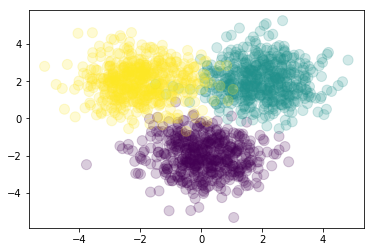

In [13]:
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 100, alpha = 0.2);

In [14]:
D = 2
M = 3
K = 3

# init weights
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [15]:
def forward_prop(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis = 1, keepdims = True) # softmax
    return Y

In [16]:
def accuracy(Y, preds):
    # init
    n_correct = 0
    n_total = len(Y)
    
    for i in xrange(len(Y)):
        if Y[i] == preds[i]:
            n_correct += 1
            
    return float(n_correct) / n_total

In [17]:
prob_Y = forward_prop(X, W1, b1, W2, b2)
preds = np.argmax(prob_Y, axis = 1)

# Check
assert(len(preds) == len(Y))

print 'Accuracy (randomly chosen weights)', accuracy(Y, preds)

Accuracy (randomly chosen weights) 0.246
